# Imports and Loading Data

I've pickled the tables and series I created in wrangling notebook. 

In [1]:
import pandas as pd
import numpy as np
import pickle_funcs as pk
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data_dict = pk.unpickle_object('data')

In [34]:
data_dict.keys()

dict_keys(['stdevs', 'averages', 'data'])

In [35]:
data = data_dict['data']
averages = data_dict['averages']
stdevs = data_dict['stdevs']

# Measure of Inequality

One way to do this is to just compare the 20th percentile with the 80th. 

In [39]:

def calc_inequality_v1(data, year, verbose=False):
    """Calculates difference between 20th and 80th percentile as a percent of the 20th"""
    percentile_20th = data[year].quantile(q=0.20)
    percentile_80th = data[year].quantile(q=0.80)

    inequality = 100 * (percentile_80th - percentile_20th) / percentile_20th
    inequality = round(inequality, 2)
    if verbose:
        print('inequality in %s was %s percent.' % (year, inequality))
    
    return inequality


def calc_inequality_v2(data, year, verbose=False):

    percentile_20th = data[year].quantile(q=0.20)
    percentile_80th = data[year].quantile(q=0.80)

    inequality = 100 * (percentile_80th - percentile_20th) / percentile_20th
    inequality = round(inequality, 2)
    if verbose:
        print('inequality in %s was %s percent.' % (year, inequality))
    
    return inequality


In [37]:
# Create two lists, one for years and one for values.
ineq_values = []
ineq_years = []
for col in range(len(data.columns)):
    year = (data.columns[col])
    inequality = calc_inequality_v1(data, year)
    ineq_values.append(inequality)
    ineq_years.append(year)

In [31]:

inequality_version1 = pd.Series(ineq_values, index=ineq_years, name='Inequality')

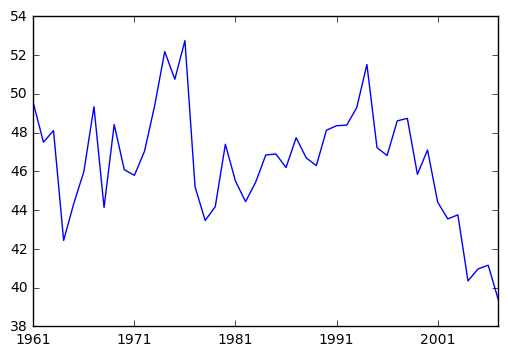

In [38]:
inequality_version1.plot()